# Prepare data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

from preparation import prepare_data, select_by_date_interval
from plotting import bar_plot_videos_per_h, get_videos_per_h_series

In [2]:
plt.rcParams['figure.dpi'] = 150 # make your graphs bigger
style.use('seaborn') # apply style for your plot. Hard to read letters in pie charts if style isn't suitable

In [3]:
PATH = "C:/Users/San/Documents/CS projects/yt_activity_analysis/data/Takeout/YouTube and YouTube Music/history/watch-history.json"
df = prepare_data(PATH)

# start_date = "2022-07-15"
# end_date = "2022-08-30"
# df = select_by_date_interval(df_full, start=start_date)
# df

# Count on how many videos you clicked per channel

In [4]:
counts = df["channel_name"].value_counts()
counts

STERNENKO                          228
Eurovision Song Contest            208
Viva La Dirt League                 94
Adam Something                      89
Beau of the Fifth Column            75
                                  ... 
Ніна - Україна / Nina - Ukraine      1
RPGuides                             1
Buy me a fighter jet                 1
Better Data Science                  1
АрміяInform                          1
Name: channel_name, Length: 1455, dtype: Int64

# Break into categories

In [5]:
bins = [0, 1, 5, 10, 20, 50, np.inf]
names = ['1', '2-5', '6-10', '11-20', '21-50', ">50"]

intervals = pd.cut(counts, bins, labels=names)

df2 = pd.DataFrame({"video_count": counts, "interval": intervals})
df2

,video_count,interval
STERNENKO,228,>50
Eurovision Song Contest,208,>50
Viva La Dirt League,94,>50
Adam Something,89,>50
Beau of the Fifth Column,75,>50
...,...,...
Ніна - Україна / Nina - Ukraine,1,1
RPGuides,1,1
Buy me a fighter jet,1,1
Better Data Science,1,1


# Plot percentage of categories

In [6]:
interval_count = df2["interval"].value_counts()
percentage = interval_count/len(df2)
percentage

1        0.638488
2-5      0.229553
6-10     0.052234
11-20    0.039175
21-50    0.032302
>50      0.008247
Name: interval, dtype: float64

<AxesSubplot:ylabel='interval'>

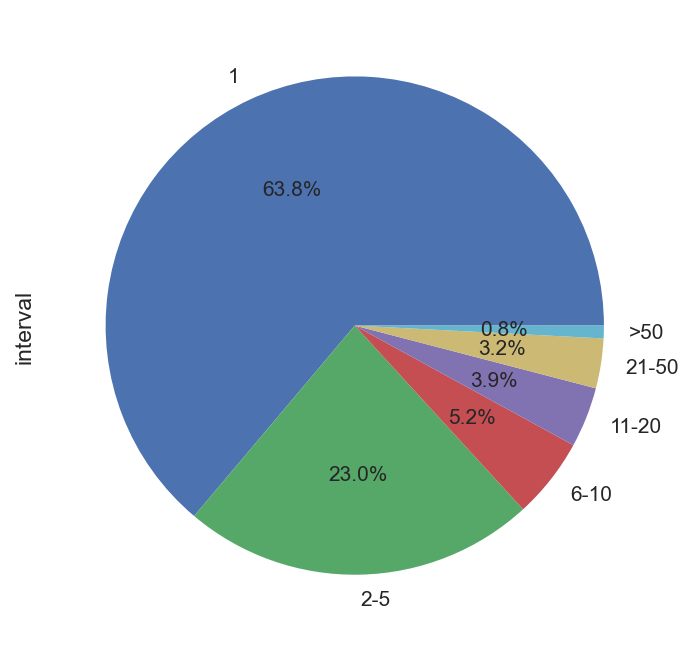

In [7]:
percentage.plot.pie(autopct='%1.1f%%')

# Plot n most watched channels

1697

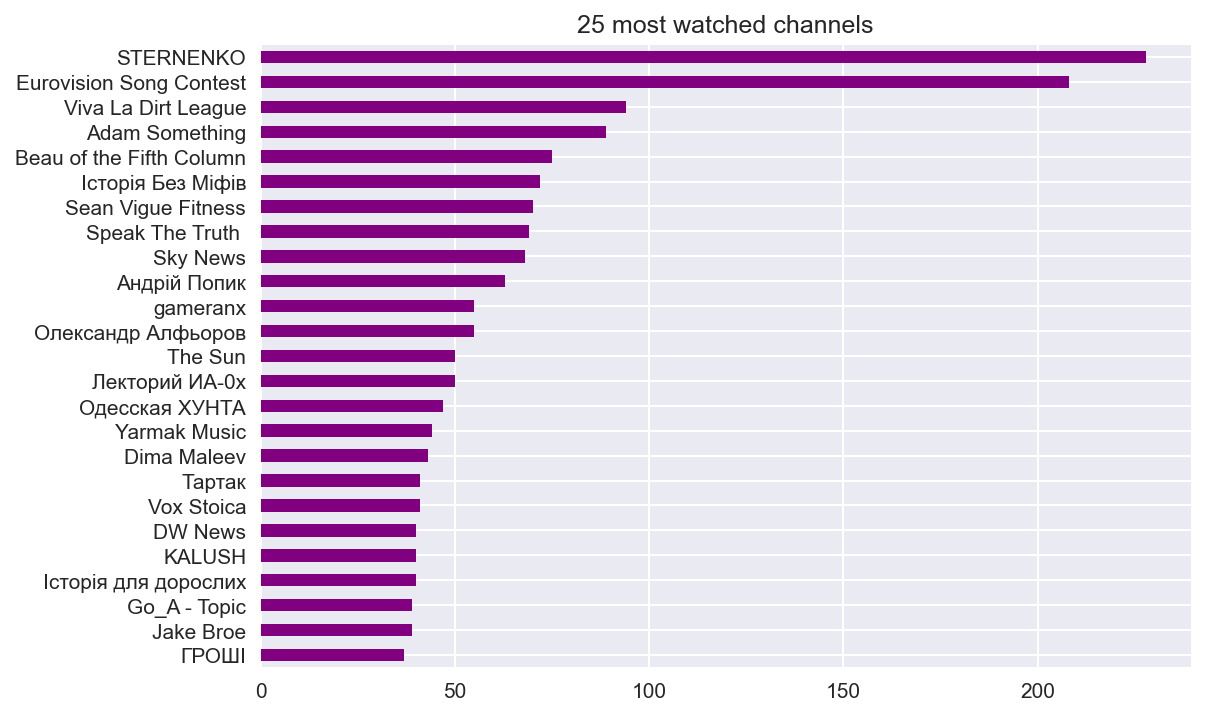

In [8]:
n = 25
top_n_channels = counts.iloc[:n]
ax = top_n_channels.plot(kind="barh", color="purple", title=f"{n} most watched channels")
ax.invert_yaxis()
sum(top_n_channels)

In [9]:
top_n_channels/sum(top_n_channels)

STERNENKO                   0.134355
Eurovision Song Contest     0.122569
Viva La Dirt League         0.055392
Adam Something              0.052445
Beau of the Fifth Column    0.044196
Історія Без Міфів           0.042428
Sean Vigue Fitness          0.041249
Speak The Truth              0.04066
Sky News                    0.040071
Андрій Попик                0.037124
gameranx                     0.03241
Олександр Алфьоров           0.03241
The Sun                     0.029464
Лекторий ИА-0х              0.029464
Одесская ХУНТА              0.027696
Yarmak Music                0.025928
Dima Maleev                 0.025339
Тартак                       0.02416
Vox Stoica                   0.02416
DW News                     0.023571
KALUSH                      0.023571
Історія для дорослих        0.023571
Go_A - Topic                0.022982
Jake Broe                   0.022982
ГРОШІ                       0.021803
Name: channel_name, dtype: Float64

In [10]:
top_n_channels/sum(counts)

STERNENKO                   0.038416
Eurovision Song Contest     0.035046
Viva La Dirt League         0.015838
Adam Something              0.014996
Beau of the Fifth Column    0.012637
Історія Без Міфів           0.012131
Sean Vigue Fitness          0.011794
Speak The Truth             0.011626
Sky News                    0.011457
Андрій Попик                0.010615
gameranx                    0.009267
Олександр Алфьоров          0.009267
The Sun                     0.008425
Лекторий ИА-0х              0.008425
Одесская ХУНТА              0.007919
Yarmak Music                0.007414
Dima Maleev                 0.007245
Тартак                      0.006908
Vox Stoica                  0.006908
DW News                      0.00674
KALUSH                       0.00674
Історія для дорослих         0.00674
Go_A - Topic                0.006571
Jake Broe                   0.006571
ГРОШІ                       0.006234
Name: channel_name, dtype: Float64

In [11]:
top_n_channels

STERNENKO                   228
Eurovision Song Contest     208
Viva La Dirt League          94
Adam Something               89
Beau of the Fifth Column     75
Історія Без Міфів            72
Sean Vigue Fitness           70
Speak The Truth              69
Sky News                     68
Андрій Попик                 63
gameranx                     55
Олександр Алфьоров           55
The Sun                      50
Лекторий ИА-0х               50
Одесская ХУНТА               47
Yarmak Music                 44
Dima Maleev                  43
Тартак                       41
Vox Stoica                   41
DW News                      40
KALUSH                       40
Історія для дорослих         40
Go_A - Topic                 39
Jake Broe                    39
ГРОШІ                        37
Name: channel_name, dtype: Int64

# Count on how many videos you clicked per hour

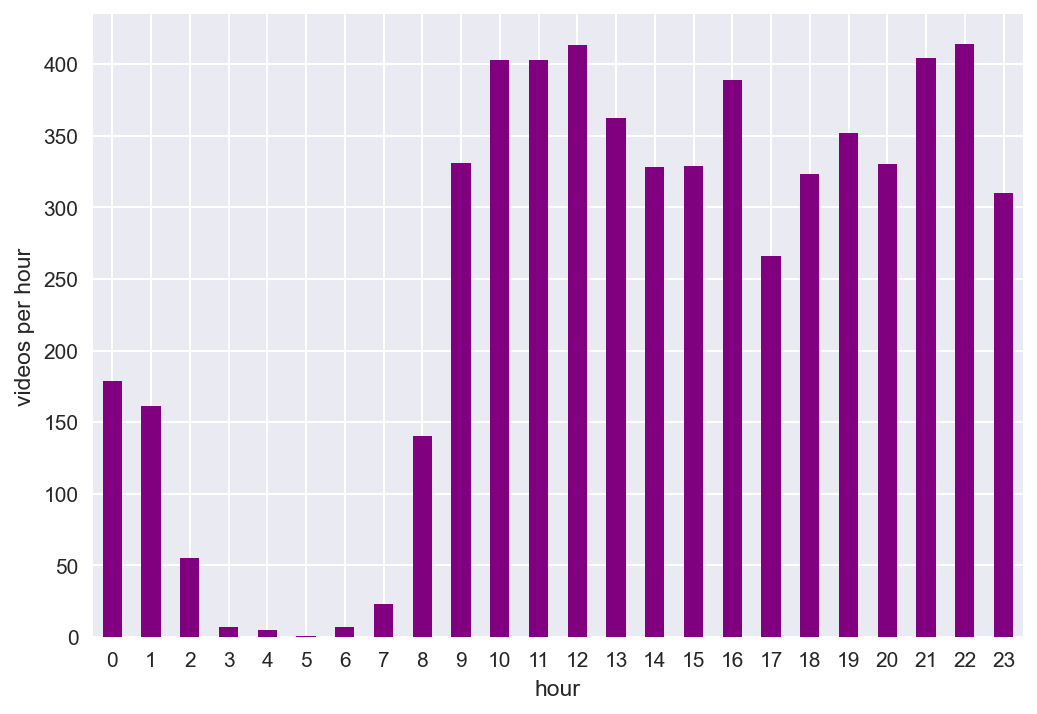

In [12]:
bar_plot_videos_per_h(df)

# Discover at what hours you watch a particular channel 

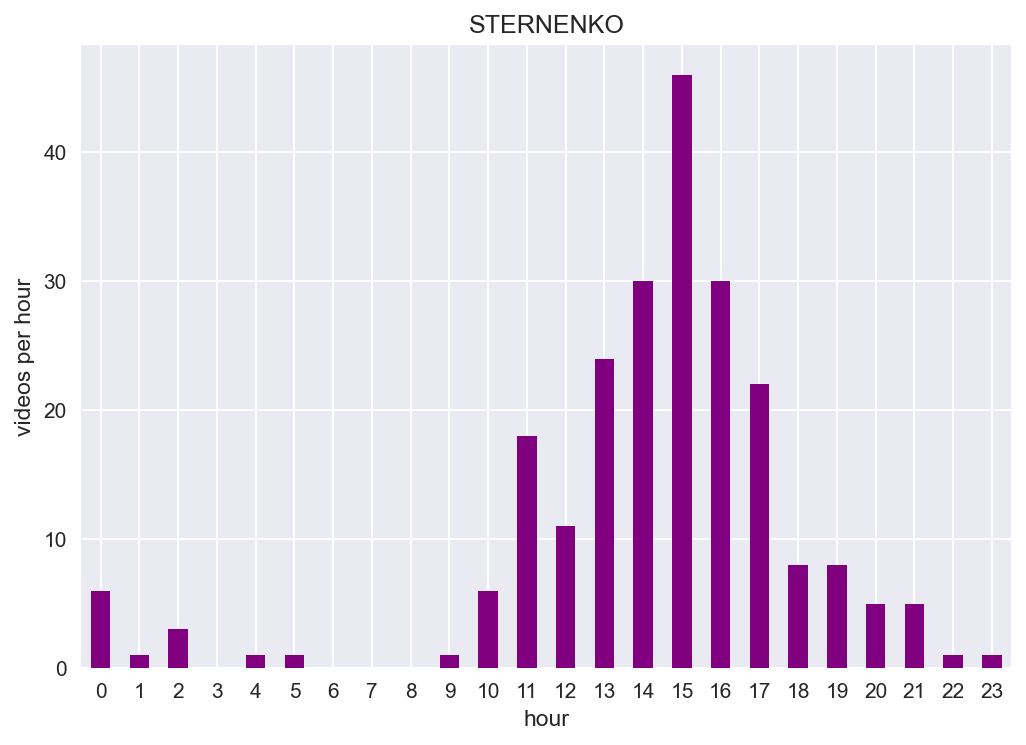

In [13]:
channel_name_to_look = "STERNENKO"
bar_plot_videos_per_h(df, channel_name_to_look)

# Plot videos count per hour for several channels

In [14]:
list_top_n_channels = top_n_channels.index.to_list()
list_top_n_channels

['STERNENKO',
 'Eurovision Song Contest',
 'Viva La Dirt League',
 'Adam Something',
 'Beau of the Fifth Column',
 'Історія Без Міфів',
 'Sean Vigue Fitness',
 'Speak The Truth ',
 'Sky News',
 'Андрій Попик',
 'gameranx',
 'Олександр Алфьоров',
 'The Sun',
 'Лекторий ИА-0х',
 'Одесская ХУНТА',
 'Yarmak Music',
 'Dima Maleev',
 'Тартак',
 'Vox Stoica',
 'DW News',
 'KALUSH',
 'Історія для дорослих',
 'Go_A - Topic',
 'Jake Broe',
 'ГРОШІ']

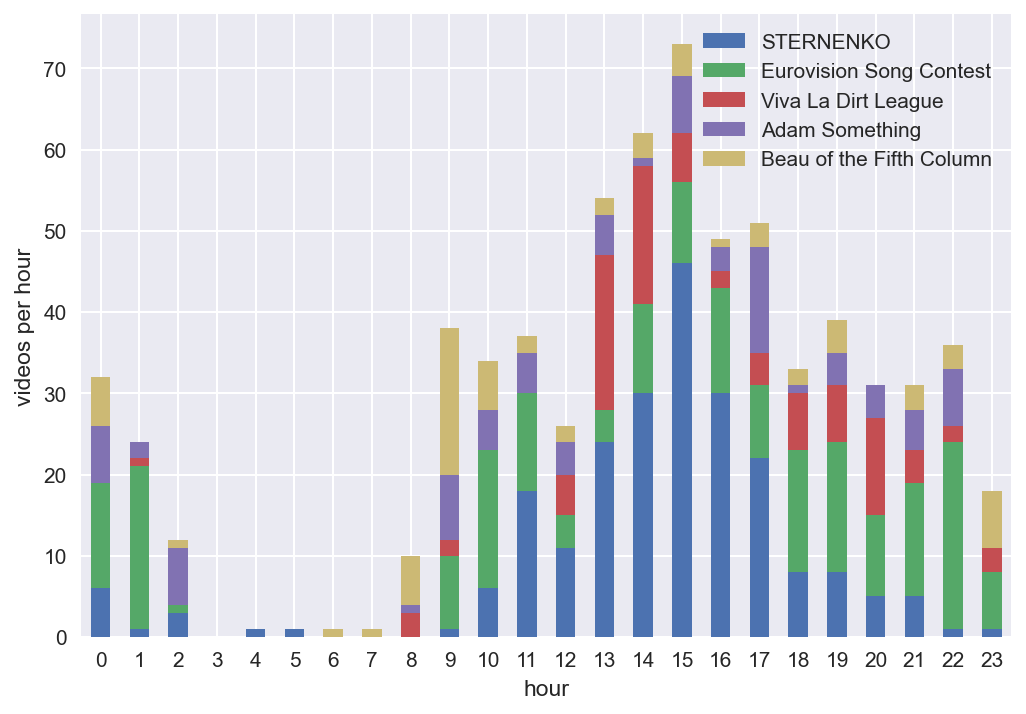

In [15]:
start_point = 0
interval = 5
end_point = start_point + interval

df_data = {f"{list_top_n_channels[start_point]}": get_videos_per_h_series(
    df, list_top_n_channels[start_point])}
df_top_n_channels = pd.DataFrame(data=df_data)
for i in range(start_point+1, end_point):
    df_top_n_channels[list_top_n_channels[i]] = get_videos_per_h_series(
        df, list_top_n_channels[i])
df_top_n_channels
df_top_n_channels.plot.bar(stacked=True, rot=0,
                           xlabel="hour", ylabel="videos per hour").legend(bbox_to_anchor=(1,1))

# Count how many videos you click per day of week

<AxesSubplot:>

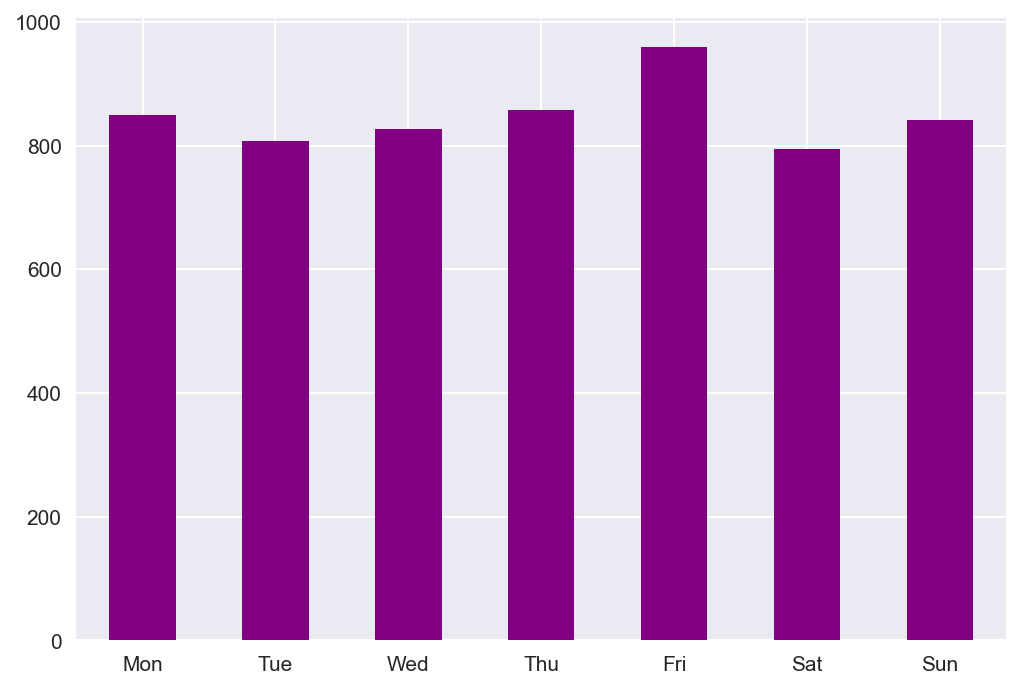

In [16]:
df['weekday'] = df['time'].dt.strftime('%a')
total = len(df["weekday"])
str_week_days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
videos_per_weekday = df["weekday"].value_counts()[str_week_days] # sort with custom index
videos_per_weekday.plot.bar(color="purple", rot=0)

# Change in use of a particular channel over months (Use all data for this!)

In [17]:
df.dtypes

video_title                          string
channel_name                         string
time            datetime64[ns, Europe/Kiev]
weekday                              object
dtype: object

In [18]:
df["month"] = df["time"].dt.month
df["time"].dt.month.value_counts()

7    1363
5    1222
6    1164
4    1102
8    1084
Name: time, dtype: int64

In [46]:
channel_name = "STERNENKO"

def get_videos_per_month_series(df, channel_name=""):
    if not channel_name:
        get_months = pd.DatetimeIndex(df['time']).hour
    else:
        df_for_channel = df.loc[df["channel_name"] == channel_name]
        # get months from datetime
        get_months = pd.DatetimeIndex(df_for_channel['time']).month
    # count on how many videos you clicked and sort months from 1 to 12
    count_videos_per_month = get_months.value_counts().sort_index()
    months_of_the_year = [h for h in range(1, 13)]
    # get full range of x values from 1 to 12
    series = pd.Series(count_videos_per_month, months_of_the_year)
    # change NaN to 0
    series = series.fillna(0)
    # change dtype to int and return
    return series.astype(int)

series = get_videos_per_month_series(df, channel_name=channel_name)
series

1      0
2      0
3      0
4     81
5     44
6     36
7     35
8     32
9      0
10     0
11     0
12     0
Name: time, dtype: int32

<AxesSubplot:title={'center':'STERNENKO'}, xlabel='month', ylabel='videos count'>

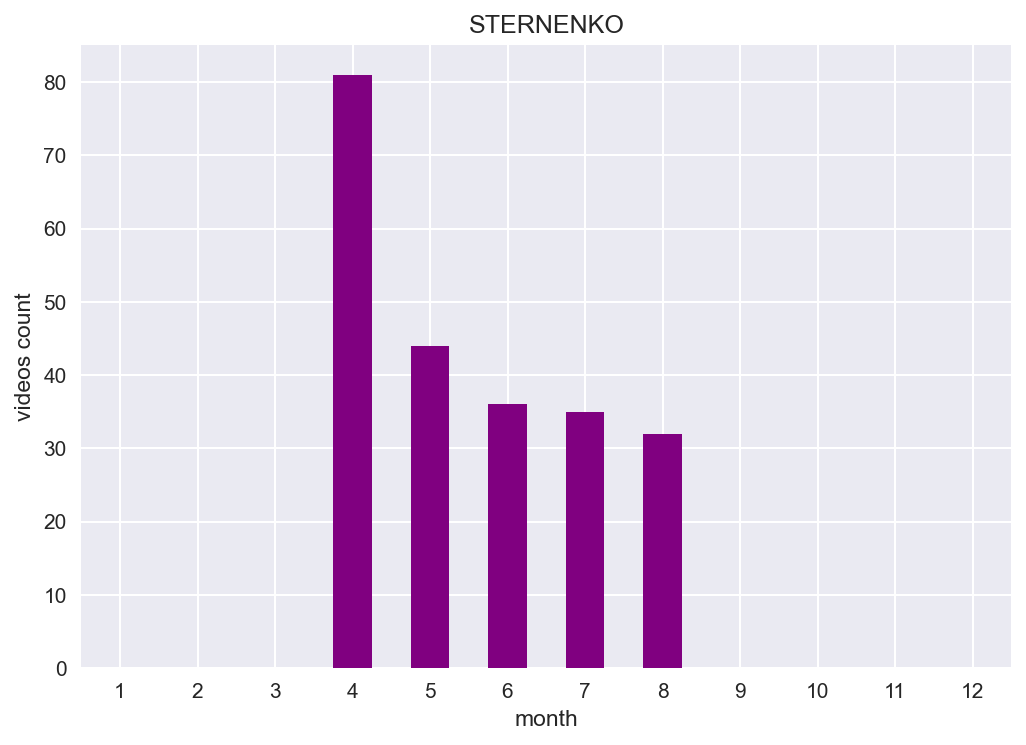

In [47]:
series.plot.bar(color="purple", rot=0,
                title=f"{channel_name}",
                xlabel="month", ylabel="videos count")